# 1.时间序列分析概述


时间序列是按照时间次序排列的随机变量序列，如：每日股票收盘价，每隔15min的风力发电量、每年的GDP等等。 从商业经济、管理或者工程科技，时间序列分析都占据着十分重要的作用，应用范围十分广泛。 下面，我们先通过几个案例学习时间序列分析的几个目标：

**（1）描述：** （以下例子参考于何书元老师的《应用时间序列分析》第一章 例1.2）

下面一份数据列出了某城市1991年至1996年中每个季度的民用煤消耗量（单位：吨），我们需要对民用煤消耗量进行合理的描述性分析。

In [1]:
# 引入相关工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# plt.rcParams['font.sans-serif'] = ["SimHei"]  # 绘图显示中文
# plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 读取数据并进行初步展示
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
data.head()

,Year,QTY
0,1991Q1,6878.4
1,1991Q2,5343.7
2,1991Q3,4847.9
3,1991Q4,6421.9
4,1992Q1,6815.4


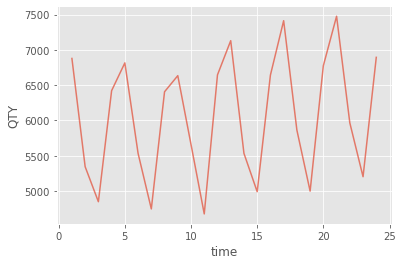

In [3]:
# 对民用煤消耗量做可视化展示：
plt.plot(np.arange(24)+1, data['QTY'],alpha=0.7)
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

从图中可以清晰看到，数据有强烈的周期信息，周期是4且民用煤消耗量呈现略微逐年增加的趋势。为了验证时间序列是否具有趋势信息和周期信息，我们需要对时间序列进行分解。在分解之前，我们先来学习时间序列的几个重要术语：

**时间序列**：按照时间次序排列的随机变量序列$X_1,X_2,...$称为时间序列。因此，时间序列中每一个时刻都是一个随机变量，而我们观察到的数值就是时间序列在某个时刻的观测值，用$x_1,x_2,...,x_N$表示。如：

|  序号    |  $\{X_t\}$        | $\{x_t\}$    |QTY     |
|  ----    | ----              |----          |  ----  |
| 0        | $X_0 $~ N(10,0.1) | $x_0$        | 11     |
| 1        | $X_1 $~ N(10,0.1) | $x_1$        | 9      |
| 2        | $X_2 $~ N(10,0.1) | $x_2$        | 10     |
| 3        | $X_3 $~ N(10,0.1) | $x_3$        | 12     |
| 4        | $X_4 $~ N(10,0.1) | $x_4$        | 11     |
| 5        | $X_5 $~ N(10,0.1) | $x_5$        | 9      |


**时间序列的分解**：大量的时间序列的观测样本都表现出趋势性、季节性和随机性，因此可以把时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random），也就是说时间序列$\{X_t\}$是这三项的叠加。有的同学可能在其他教材上看到时间序列还可以分解为趋势项、季节项、随机项还有**周期项**，实际上周期项往往是非固定频率的波动而季节项是固定频率的波动，二者有着显著的差别。再者，趋势可以被宽泛地定义为“平均水平上的长时期变化", 这个定义实际上是不准确的，举个例子：温度变化假如是50年一个周期，但是现阶段只有10年的温度数据，那么它可能呈现一种趋势，但是如果我们有几百年的数据，那么周期性比较明显了，因此20年数据中体现的趋势只不过是较大的周期中的一部分，最好的方法就是把趋势性和周期性结合起来考虑，而 $T_{t}$正是综合考虑了趋势性与周期性信息。

*下面给出一段时间序列分解的数学推导，感兴趣的同学可以仔细琢磨，不感兴趣的同学可以跳过此段！*

假如时间序列的季节项$\{S_t\}$只有一个周期s，那么$S(t+s)=S(t), \quad t=1,2,...$，于是季节项$\{S_t\}$在任何一个周期内的平均数是常数：$\frac{1}{s} \sum_{j=1}^{s} S(t+j)=c$。这个结论在周期函数中显而易见，如：$y = sin(x)$，周期是$2\pi$，那么在任意$2\pi$周期内$y = sin(x)$的平均值为0。可以使用python代码模拟下这个结论：

周期内的平均值为： 0.01237428844100312


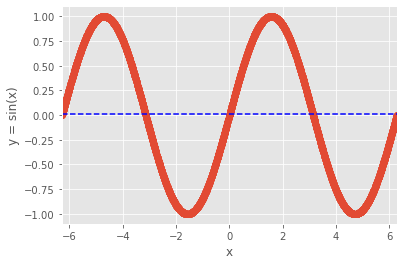

In [4]:
# 使用python模拟周期函数在周期内的平均值为常数c
x = np.random.uniform(-2*np.pi,2*np.pi,10000)
y = np.sin(x)
y_mean = np.mean(y)
print("周期内的平均值为：",y_mean)
plt.scatter(x,y)
plt.axhline(y=y_mean,c="blue",ls='--')
plt.xlim(-2*np.pi,2*np.pi)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.show()

因此，我们可以让时间序列分解式$X_{t}=T_{t}+S_{t}+R_{t}, \quad t=1,2, \cdots$ 中的趋势项的均值化为0：$X_{t}=\left(T_{t}+c\right)+\left(S_{t}-c\right)+R_{t}, \quad t=1,2, \cdots$。同时，我们也希望随机项的均值等于0，即：$\mathrm{E} R_{t}=0, \quad t=1,2, \cdots $.

现在，我们使用几个案例介绍常用的分解时间序列的方法：

- **方法1：分段趋势法：**

分段趋势法把趋势项定义成一段时间内的趋势，如民用煤消耗量数据中，从年平均的角度看，数据有缓慢逐年上升趋势，最简单的方法就是把趋势项$\{T_t\}$ 定义为年平均，即：

$$
\begin{aligned}
&\hat{T}_{1}=\cdots=\hat{T}_{4} = \frac{6878.4+5343.7+4847.9+6421.9}{4} = 5873.0 \\
&\hat{T}_{5}=\cdots=\hat{T}_{8} = \frac{6815.4+5532.6+4745.6+6406.2}{4} = 5875.0 \\
&\cdots \cdots \cdots \cdots \cdots \\
&\hat{T}_{21}=\cdots=\hat{T}_{24} = \frac{7476.5+5965.5+5202.1+6894.4}{4} = 6384.5
\end{aligned}
$$

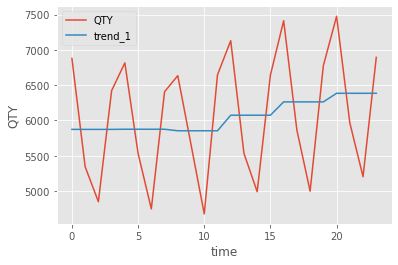

In [5]:
# 分段趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list})
t_1 = [5873.0,5875.0,5853.3,6073.7,6262.6,6384.5] # 分段趋势
t_1 = [val for val in t_1 for _ in range(4)]   # 让一年内每个季度的趋势项都是该年的均值
data['trend_1'] = t_1
data[['QTY','trend_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

由于时间序列分解为三个部分的叠加：
$$
X_t = T_t + S_t + R_t, t = 1,2,......   
$$

其中，$\{T_t\}$是趋势项（Trend），$\{S_t\}$是季节项（Seasonal），$\{R_t\}$是随机项（Random）。因此，时间序列的原始序列减去趋势项的估计值$\{\hat{T}_t \}$得到的数据只包含季节项和随机项。可以使用第k季度的均值作为季节想$S(k),\quad 1\leq k \leq 4$，因此：

$$
\begin{array}{ll}
\hat{S}(1) = \frac{6878.4 + 6815.4 + 6634.4 + 7130.2 + 7413.5 + 7476.5}{6} = 1004.4\\ 
\hat{S}(2) = \frac{5343.7 + 5532.6 + 5658.5 + 5532.6 + 5863.1 + 5965.5}{6} = -404.3 \\
\hat{S}(3) = \frac{4847.9 + 4745.6 + 4674.8 + 4989.6 + 4997.4 + 5202.1}{6} = -1144.1\\ 
\hat{S}(4) = \frac{6421.9 + 6406.2 + 6645.5 + 6642.3 + 6776.1 + 6894.1}{6} = 544.0 
\end{array}
$$

最后，使用原始时间序列减趋势项减季节项等于随机项的估计值，即：
$$
\hat{R}_{t}=x_{t}-\hat{T}_{t}-\hat{S}_{t}, \quad 1 \leqslant t \leqslant 24 .
$$

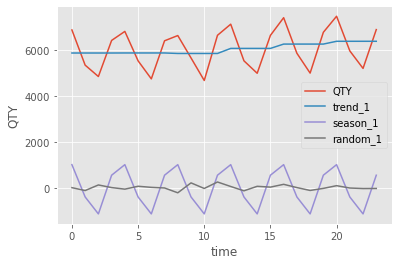

In [6]:
# 分段趋势法：分解季节项和随机项
season_1 = [1004.4,-404.3,-1144.1,544.0]
season_1 = season_1 * 6   # 6年
data['season_1'] = season_1
data['random_1'] = data['QTY'] - data['trend_1'] - data['season_1']
data[['QTY','trend_1','season_1','random_1']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

最后，总结一下分解图的结论：从时间序列分析图中的趋势项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量呈逐年递增的趋势；从时间序列分析图中的季节项可以看出，某城市1991年至1996年中每个季度的民用煤消耗量在每个季度均有波动，波动范围大约在-1000 ~ 1000，相对趋势项来说影响较小（大约为0 ~ 1/6）。

- **方法2：回归直线趋势法**

在分段趋势法中，我们把趋势项估计为每一年的平均数，6年的数据分成了6段，但是这个分析粒度显然太粗糙了，但是我们还是从粗糙的分段趋势法中找到了民用煤消耗量呈逐年递增的趋势。因此，我们可以使用回归直线代替分段趋势来代表趋势项，即时间序列$x_t$满足以下一元回归模型：

$$
x_{t}=\beta_0+\beta_1 t+\varepsilon_{t}, \quad t=1,2, \cdots
$$

再者，除了趋势项以外的季节项与随机项的操作不变！

*下面是关于一元线性回归模型的参数估计推导，感兴趣的同学们可以仔细阅读，不感兴趣的同学们可以跳过此段！*


趋势项的回归曲线为：y_hat = 5789.549637681161 + 21.795695652173926 * t


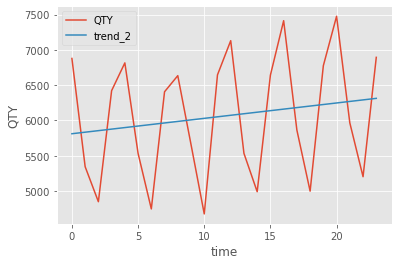

In [7]:
# 回归直线趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]

t_list = np.arange(len(time_index_list))+1
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list,
                     't':t_list})

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(data[['t']],data['QTY'])
b0,b1 = lr.intercept_,lr.coef_[0]   # 返回模型的常数项与参数估计值
print("趋势项的回归曲线为：y_hat = "+str(b0)+ " + " + str(b1) + " * t" )
t_2 = lr.predict(data[['t']])   #返回趋势项的预测值
data['trend_2'] = t_2
data[['QTY','trend_2']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

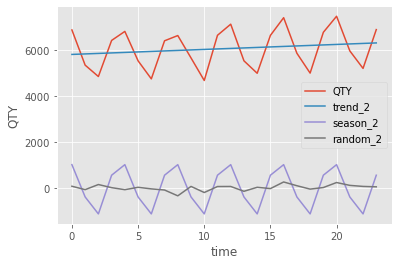

In [8]:
# 回归直线趋势法：分解季节项和随机项
season_2 = [1004.4,-404.3,-1144.1,544.0]
season_2 = season_2 * 6   # 6年
data['season_2'] = season_2
data['random_2'] = data['QTY'] - data['trend_2'] - data['season_2']
data[['QTY','trend_2','season_2','random_2']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

- 方法3：二次曲线拟合

除了使用线性方程对数据的趋势项进行描述，当我们发现数据中的趋势有明显的非线性关系的时候，也可以使用非线性方程对数据的趋势项进行描述，最简单的非线性函数就是二次函数！这时，假设时间序列数据的趋势项满足二元线性回归模型，即：

$$
x_{t}=\beta_0 +\beta_1 t+\beta_2 t^{2}+\varepsilon_{c}, \quad t=1,2, \cdots
$$

趋势项的回归曲线为：y_hat = 5934.407262845851 + -11.632987078139355 * t + 1.3371473092125317t^2


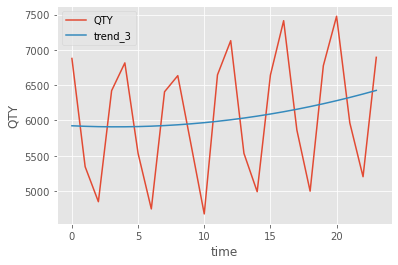

In [9]:
# 二次曲线拟合趋势法：分解趋势信息
time_index_list = ['1991Q1','1991Q2','1991Q3','1991Q4',
                   '1992Q1','1992Q2','1992Q3','1992Q4',
                   '1993Q1','1993Q2','1993Q3','1993Q4',
                   '1994Q1','1994Q2','1994Q3','1994Q4',
                   '1995Q1','1995Q2','1995Q3','1995Q4',
                   '1996Q1','1996Q2','1996Q3','1996Q4']
QTY_list = [6878.4,5343.7,4847.9,6421.9,
            6815.4,5532.6,4745.6,6406.2,
            6634.4,5658.5,4674.8,6645.5,
            7130.2,5532.6,4989.6,6642.3,
            7413.5,5863.1,4997.4,6776.1,
            7476.5,5965.5,5202.1,6894.1]

t_list = np.arange(len(time_index_list))+1
data = pd.DataFrame({'Year':time_index_list,
                     'QTY':QTY_list,
                     't':t_list})
data['t_square'] = data['t']**2
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(data[['t','t_square']],data['QTY'])
b0,b1 = lr.intercept_,lr.coef_   # 返回模型的常数项与参数估计值
print("趋势项的回归曲线为：y_hat = "+str(b0)+ " + " + str(b1[0]) + " * t" + " + " + str(b1[1]) + "t^2" )
t_3 = lr.predict(data[['t','t_square']])   #返回趋势项的预测值
data['trend_3'] = t_3
data[['QTY','trend_3']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

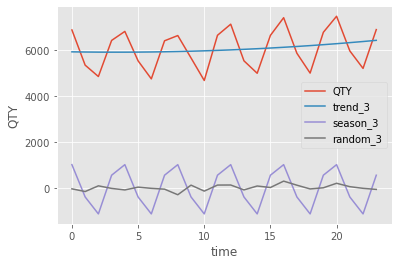

In [10]:
# 二次曲线拟合趋势法：分解季节项和随机项
season_3 = [1004.4,-404.3,-1144.1,544.0]
season_3 = season_3 * 6   # 6年
data['season_3'] = season_3
data['random_3'] = data['QTY'] - data['trend_3'] - data['season_3']
data[['QTY','trend_3','season_3','random_3']].plot()
plt.xlabel("time")
plt.ylabel("QTY")
plt.show()

- **方法4：经典分解法**

以上的篇幅介绍的都是按照加法模型的原理一步步推导然后自己写python代码实现的，但是在statsmodel中已经有关于经典分解法的具体实现，这个命令就是**seasonal_decompose** 函数，这个函数能帮我们自动完成时间序列的分解，无需自己使用python编写具体的分解算法。我们先介绍这个函数的相关使用，然后再来看看这个函数具体的实现细节！在这个案例中，我们使用co2数据集进行分析，这个数据集是statsmodel内置的时间序列数据集，我们对这个数据集进行时间序列的分解。

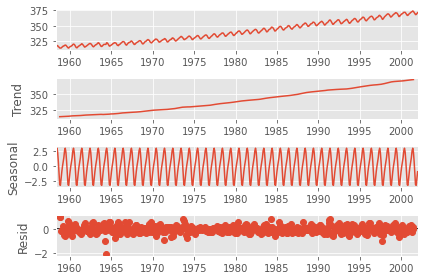

In [11]:
# 使用官方示例的co2数据集展示seasonal_decompose分解
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import seasonal_decompose
data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据
result = seasonal_decompose(data, model='additive')   # 当model='multiplicative'时是乘法模型的分解（下面内容即将介绍）
result.plot()
plt.show()


In [12]:
# 如何提取序列的趋势项、季节项和随机项
trend = result.trend   ## 模型的趋势项
seasonal = result.seasonal   ## 模型的季节项
resid = result.resid   ## 模型的随机项

那这个传统的**seasonal_decompose** 函数的原理是什么呢？其实与前面的经典算法大同小异，只是在具体的趋势项、季节项等计算上有少许差异。

（1）分解趋势项：中心化移动均值

什么是中心化移动均值？想象一下当我们希望计算t时刻的序列值$X_t$的趋势项的值时，一个很自然的想法就是使用t时刻前后的h个时点的序列值的平均值近似估算$X_t$的趋势项的值，即：
$$
T_t = \frac{X_{t-h}+X_{t-h+1}+...+X_t+...+X_{t+h-1}+X_{t+h}}{2h+1}
$$
在这里，我们不去追究t的奇偶性的问题，因为不同的奇偶性会导致上述公式有少许不同。至此，我们可以通过以上公式估算t时刻的序列值$X_t$的趋势项$T_t$。

（2）分解季节项：（与前面的几个经典算法保持一致）

采用将原始时间序列减去趋势项：
$$
S_{t}=X_{t}-T_{t}
$$

然后，将各个周期内相同频率下的值平均化, 得到季节项$S_t$ 。

（3）分解随机项：$R_t = X_t - T_t - S_t,\quad t=1,2,3....$

- **方法5：STL分解**

以上的时间序列的分解方法都是基于趋势项服从某个简单形式的基础上得到的，比如使趋势满足线性回归的回归直线趋势法、使趋势满足二次曲线回归的二次曲线拟合法等等，这些假设使得时间序列的分解方法无法处理任意形式的季节性。下面介绍的STL分解全称是Seasonal and Trend Decomposition by Loess，其中Loess是一种基于局部多项式拟合的非参数回归方法。这种STL分解方法不但可以处理任意形式的季节性，而且季节成分可以随时间改变，变化的速率受我们自己控制，趋势成分的复杂程度也受到我们自身控制。但是这种方法也只能处理加法模型，即：$X_t = T_t + S_t + R_t, t = 1,2,......   $，不能处理**乘法模型**（稍后介绍）。

<Figure size 864x576 with 0 Axes>

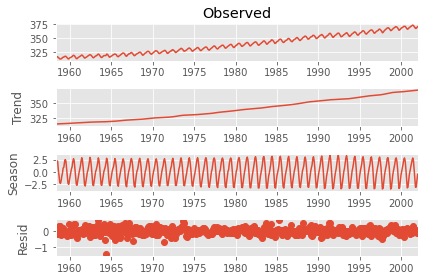

In [13]:
# 使用官方示例的co2数据集展示STL分解
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import STL   ## 引入STL方法

data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据
res = STL(data).fit()
plt.figure(figsize=(12,8))
res.plot()
plt.show()

STL分解如何作用于乘法模型呢？什么是乘法模型呢？首先，我们先来学习什么是乘法模型：假设时间序列可以分解为趋势项、季节项和随机项，但是他们之间的关系是乘法关系，这就是乘法模型。

$$
X_{t}=T_{t} \cdot S_{t} \cdot I_{t} \quad t = 1,2,......
$$

STL分解是无法直接作用于乘法模型的，但是乘法模型可以稍作转换变成加法模型，如：

$$
\begin{gathered}
\log \left(X_{t}\right)=\log \left(\operatorname{T}_{t} \times \text { S }_{t} \times \operatorname{R}_{t}\right)=\log \left(\operatorname{T}_{t}\right)+\log \left(\text { S }_{t}\right) 
+\log \left(\text { R }_{t}\right)
\end{gathered}
$$

也就是说，可以先将数据取对数，进行STL分解后的各分量结果取指数即可。

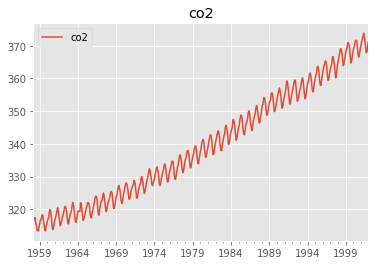

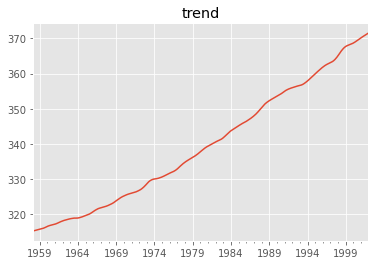

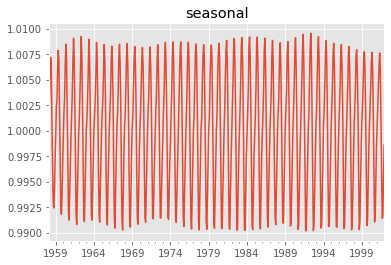

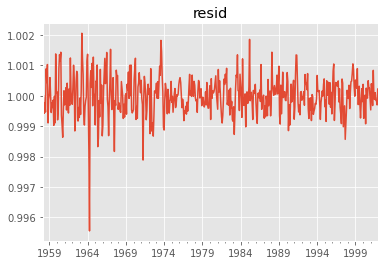

In [14]:
# 使用官方示例的co2数据集展示STL分解(乘法模型)
from statsmodels.datasets import co2  # 引入co2数据集
from statsmodels.tsa.seasonal import STL   ## 引入STL方法

data = co2.load().data
data = data.resample('M').mean().ffill()   # 将数据按月重采样得到新的数据

data = np.log(data)   ## 对数据取对数实现乘法模型转化为假发模型
res = STL(data).fit()
trend = np.exp(res.trend)   ## 乘法模型的趋势项
seasonal = np.exp(res.seasonal)   ## 乘法模型的季节项
resid = np.exp(res.resid)   ## 乘法模型的随机项
data = np.exp(data)  ## 还原数据项

data.plot()
plt.title("co2")
plt.show()

trend.plot()
plt.title("trend")
plt.show()

seasonal.plot()
plt.title("seasonal")
plt.show()

resid.plot()
plt.title("resid")
plt.show()

**（2）预测:** 时间序列的预测目标是我们普遍关心的目标，也是大多数想研究时间序列分析的目的，也是我们后面章节的主要内容。什么是预测？顾名思义预测就是给定以前的历史数据，预测今天乃至未来的数据。时间序列的预测方法很多，我们将在后续章节一一详细学习，包括：
   - 简单移动平均预测以及加权移动平均预测
   - 指数平滑模型
   - 线性预测模型之ARIMA模型与SARIMA模型
   - 基于多变量时间序列的SARIMAX模型、VAR模型与XGBoost（重点介绍）
   - 基于深度学习的时间序列模型基础：RNN与LSTM
   - 时间序列模型的特征工程及框架Tsfresh（TimeSeries Fresh）
   - 工程与比赛常用模型及框架简介：FB-Prophet（重点介绍）、AutoTS（重点介绍）、DeepAR等等。

接下来的内容，我们将对预测模型做一个总结以及相关算法的简单介绍，并使用python建立预测模型中最简单的移动平均模型和指数平滑模型来解决实际问题。

**（2.1） 时间序列预测的归纳总结：**

   - 按照变量的多少划分：单变量时间序列与多变量时间序列
  
   时间序列这个名词大家很好理解，可是单变量和多变量是什么呢？这里的变量是指自变量，时间序列中自变量天然存在一个，那就是时间。这个概念类似于简单线性回归和多元线性回归的区别，单变量指的是我们的自变量中只有时间维度的一个维度值，多变量指的是数据中除了天然存在的时间维度外，还有其他时间外的自变量因素。给大家画个图就很好理解了。

   <div>
   <img src="./images/1_2.png" width="600"/>
   </div>

   解决单变量时间序列问题的常用模型有：指数平滑模型、ARIMA模型、RNN与LSTM模型等等；解决多变量时间序列问题的常见模型有：SARIMAX模型、VAR模型、Prophet模型与XGBoost模型等等。

   - 按照预测目标的多少划分：单目标时间序列和多目标时间序列

   所谓的单目标与多目标，其实就是因变量的个数。如果我们只需要预测一个时间序列的值，那么就是单目标时间序列，不管这个时间序列的自变量数量有多少个；如果我们需要预测多个时间序列的值，不管这些目标之间是否相关，都叫多目标时间序列。
   
   初学者可能会混淆多目标时间序列与多变量时间序列，多目标时间序列一般指需要预测的时间序列因变量个数多于1，但是多变量时间序列指的是自变量的个数大于1。因此，按照这个定义，单变量、多变量时间序列和单目标、多目标时间序列的概念存在交叉。如果一个数学建模问题，它的自变量个数多于1且需要预测的因变量多于1，那么把这个时间序列称为多变量多目标时间序列；同理，如果一个数学建模问题，它的自变量个数只有一个时间因素，但是它的目标有多个，那么称这个时间序列为单变量多目标时间序列问题。现实生活中，单目标时间序列和多目标时间序列都是十分常见的，下面举一个多变量多目标时间序列问题的案例（单目标太常见了，就不举出案例了）：

   案例的来源是kaggle中著名的**亚马逊销量预测比赛**，在这次比赛中，你将对位于厄瓜多尔的不同Favorita商店所销售的数千种商品的单位销售额进行预测，其中给定每个商品信息、商店信息、节假日信息、节假日信息以及石油价格信息等。具体可以转述成下图：

   <div>
   <img src="./images/1_3.png" width="600"/>
   </div>

   在此次比赛中获得冠军和季军的队伍都使用了深度时间序列模型WaveNet与传统机器学习模型的结合，他们能取得好成绩的关键是根据数据进行较为详细的特征工程，如何做特征工程我们在后续内容给大家逐一讲解。另外，亚马逊提出的DeepAR深度时间序列模型能很轻易解决上百个时间序列目标变量的问题，我们将在后续章节简单介绍这个技术。
   - 按照预测任务划分：回归、分类、聚类

   以上两个对时间序列的划分标准都是对自变量和因变量个数进行划分，基于预测任务的划分标准主要是对因变量的性质进行划分。一般来说，一个机器学习的预测任务可以分为有监督学习和无监督学习。有监督学习是指数据和问题中存在明显的因变量，我们需要使用自变量学习因变量的变化，从而进行合理的预测，如：通过影响宏观经济因素、行业因素与股票历史价格预测今日乃至未来的股票价格；无监督学习是数据中没有明确的因变量指标，我们需要在这些自变量中找到数据中的结构规律，如：通过50只股票的历史价格信息、行业信息等等自变量预测哪些股票是“好股票”，哪些股票是“坏股票”，但是事先我们并不知道什么叫好股票与坏股票的相关定义及数据，这些定义全靠通过对自变量的结构学习得来。

   有监督学习的两个重要问题就是：回归和分类。顾名思义，如果我们需要预测的因变量是连续变量，如：房价、价格、销售量等，那么这个问题叫回归问题；同理，如果我们需要预测的因变量是离散变量，如：好瓜还是坏瓜、好股票还是坏股票、猫还是狗等，那么这个问题叫分类问题。

   无监督学习的一个重要代表是聚类问题，我们需要通过学习自变量的结构划分类别标准，如：航空公司通过客户的相关信息找出哪些客户属于高价值客户、低价值客户、薅羊毛客户等等，但是事前航空公司并不知道哪些客户属于高价值、低价值和薅羊毛客户等，全靠对自变量的学习。

   <table>
  <thead>
    <tr>
      <th>客户细分</th>
      <th style="text-align: left">用户行为</th>
      <th>业务决策</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>重要价值客户</td>
      <td style="text-align: left">最近买了，经常买，花最多</td>
      <td>倾斜更多资源，VIP服务、个性化服务、附加销售</td>
    </tr>
    <tr>
      <td>重要唤回客户</td>
      <td style="text-align: left">金额高、次数多、最近无交易，需要把他们带回来</td>
      <td>DM营销，提供有用的资源，通过续订或更新的产品赢回他们</td>
    </tr>
    <tr>
      <td>重要深耕客户</td>
      <td style="text-align: left">金额高、最近有交易，频率相对较低，需要重点识别</td>
      <td>交叉销售，提供会员/忠诚计划，推荐其他产品</td>
    </tr>
    <tr>
      <td>重要挽留客户</td>
      <td style="text-align: left">做出最大的购买，但是很久没有回来了，可能流失，需要挽留</td>
      <td>重点联系或拜访，提高留存率</td>
    </tr>
     <tr>
      <td>潜力客户</td>
      <td style="text-align: left">次数多、最近有交易，金额小，需要挖掘</td>
      <td>向上销售价值更高的产品，要求评论，吸引他们</td>
    </tr>
     <tr>
      <td>新客户</td>
      <td style="text-align: left">最近有交易，交易频率不高，金额小，容易丢失，有推广价值</td>
      <td>社区活动，提供免费试用，提高客户兴趣，创建品牌知名度</td>
    </tr>
     <tr>
      <td>一般维持客户</td>
      <td style="text-align: left">次数多，金额小，最近无交易，一般维持</td>
      <td>积分制，分享宝贵的资源，以折扣推荐热门产品/续订，与他们重新联系</td>
    </tr>
     <tr>
      <td>流失客户</td>
      <td style="text-align: left">最后一次购买的时间很长，金额小，订单数量少。冬眠客户</td>
      <td>恢复客户兴趣，否则暂时放弃无价值用户</td>
    </tr>
  </tbody>
</table>

   最后，把预测任务划分标准总结成一张图：

   <div>
   <img src="./images/1_4.png" width="600"/>
   </div>

   最后，我们把以上的三种划分标准总结成一个表格，以后大家碰到具体的问题先确定碰到的时间序列问题属于哪种时间序列问题，直接查这个表格：

   <div>
   <img src="./images/1_1.png" width="600"/>
   </div>




**(2.2) 使用简单的时间序列模型进行预测分析**

介绍完预测的归类之后，我们来学习两个简单的时间序列预测模型，虽然这两个时间序列预测模型只能解决单目标单目标时间序列问题，但是我们可以通过这两个模型的使用学会时间序列预测的一般流程。这两个简单的时间序列模型分别是：**简单移动平均预测** 与 **指数平滑模型**

- 简单移动平均预测：

什么是简单移动平均预测模型呢？在介绍移动平均预测模型之前，我们先看看最朴素的预测想法：使用前一天的数据预测第二天的数据，即：$\hat{y}_{t+1} = y_t$。下面使用python进行模拟：

In [15]:
# 读取世界新冠肺炎确诊人数数据表
covid_data = pd.read_csv("./data/global_covid_count.csv",encoding='utf-8')
covid_data['Date'] = pd.to_datetime(covid_data['Date'])  # 将时间项转化为date_time格式，方便对时间操作
covid_data.head()

,Date,Confirmed_num
0,2020-01-23,0
1,2020-01-24,1
2,2020-01-25,0
3,2020-01-26,3
4,2020-01-27,0


In [16]:
# 使用昨天的数据预测下一天
covid_data['pred'] = covid_data['Confirmed_num'].shift(1)
covid_data.head(100)

,Date,Confirmed_num,pred
0,2020-01-23,0,NaN
1,2020-01-24,1,0.0
2,2020-01-25,0,1.0
3,2020-01-26,3,0.0
4,2020-01-27,0,3.0
...,...,...,...
95,2020-04-27,24675,25960.0
96,2020-04-28,24581,24675.0
97,2020-04-29,26860,24581.0
98,2020-04-30,29696,26860.0


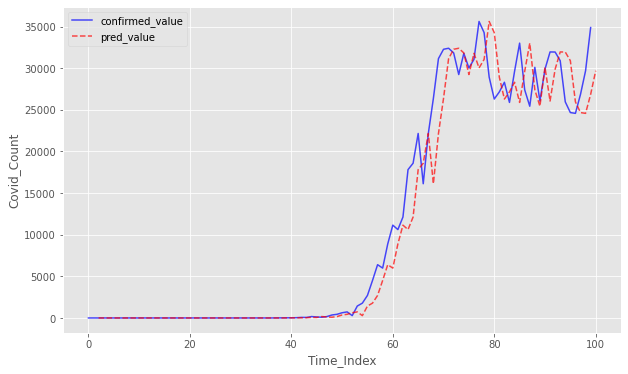

In [17]:
# 将原始序列与预测序列作图比较
# 为了看出朴素预测的效果差异，使用前100个数据进行展示
plt.figure(figsize=(10,6))
plt.plot(np.arange(100), covid_data['Confirmed_num'][:100],c='blue',
         alpha=0.7,label='confirmed_value')
plt.plot(np.arange(100)+1, covid_data['pred'][:100],c='red',
         alpha=0.7,label='pred_value',ls='--')
plt.legend()
plt.xlabel("Time_Index")
plt.ylabel("Covid_Count")
plt.show()

观察时间序列预测的朴素的想法--使用前一天的数据预测第二天的数据，即：$\hat{y}_{t+1} = y_t$的效果，可以看到该方法在新冠疫情爆发前期，效果表现较好，预测曲线非常靠近真实曲线。但是在新冠疫情爆发的100天左右，该方法的预测曲线与真实曲线偏差较大。

为什么会出现这种情况呢？我们回到该方法的本质：使用前一天的数据预测第二天的数据，即：$\hat{y}_{t+1} = y_t$，可以发现当前一天和后一天的数据相差不大时，该方法能做到很好的预测，在上面的案例中对应着新冠疫情爆发的前期，这时候疫情还没有传播开来，又或者说大家去医院后还不知道这是新冠，因此数据没有记录吧，无论是哪种情况都属于前一天和后一天的数据相差不大的情况。但是，当疫情爆发超过了60天后，每天的确诊人数较昨天存在较大波动，这时候使用前一天数据预测后一天的数据方法就不管用了，因此预测曲线呈现偏离真实曲线的状态。

那该方法有没有改进的地方呢？有的，我们预测后一天的数据时，可以不单单只看昨天的数据，把视野打开，可以看前p天的数据，取前p天数据的平均值作为明天的预测值，那这个方法叫做**移动平均法**。
$$
\hat{y}_{i}=\frac{1}{p}\left(y_{i-1}+y_{i-2}+\ldots+y_{i-p}\right)
$$
我们还是以新冠疫情数据为例子阐述移动平均法：

In [18]:
# 简单移动平均法：使用前5天数据的平均值作为明天的预测
p = 5
covid_data['rolling_p'] = covid_data['Confirmed_num'].rolling(window=p, closed='left').mean()
covid_data.head(100)

,Date,Confirmed_num,pred,rolling_p
0,2020-01-23,0,NaN,NaN
1,2020-01-24,1,0.0,NaN
2,2020-01-25,0,1.0,NaN
3,2020-01-26,3,0.0,NaN
4,2020-01-27,0,3.0,NaN
...,...,...,...,...
95,2020-04-27,24675,25960.0,30130.8
96,2020-04-28,24581,24675.0,29089.0
97,2020-04-29,26860,24581.0,27613.8
98,2020-04-30,29696,26860.0,26596.2


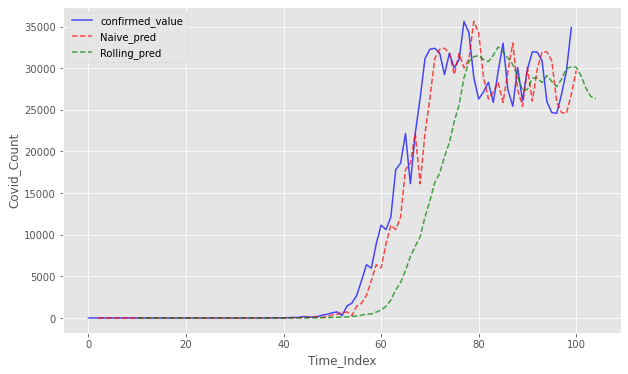

In [19]:
# 移动平均法与朴素想法的对比：
plt.figure(figsize=(10,6))
plt.plot(np.arange(100), covid_data['Confirmed_num'][:100],c='blue',
         alpha=0.7,label='confirmed_value')
plt.plot(np.arange(100)+1, covid_data['pred'][:100],c='red',
         alpha=0.7,label='Naive_pred',ls='--')
plt.plot(np.arange(100)+p, covid_data['rolling_p'][:100],c='green',
         alpha=0.7,label='Rolling_pred',ls='--')
plt.legend()
plt.xlabel("Time_Index")
plt.ylabel("Covid_Count")
plt.show()

从这个对比中，我们很容易得出一个道理：大道至简。理论上，我们对朴素想法的改进，即简单移动平均法会改进时间序列预测的效果，但是事与愿违。因此，不是越是复杂的模型效果越好，有时候简单的模型往往更加能抗能打，这里就是一个深刻的案例。为什么会出现这种情况呢？解释这种情况需要用到**偏差与方差理论**，想要一探究竟的可以移步前一章节的《机器学习》的“偏差与方差理论”进行深入学习，在这里仅仅给大家做一个大概解释。这里使用回归作为目标进行讲解，实际上分类和聚类都是一样的，就不多加赘述。（下面是理论分析，如果不感兴趣的同学们可以直接看后面的案例应用。）

**训练误差与测试误差：**

首先，我们要先明白一个概念，那就是我们预测的目的是什么？回顾预测的整个流程，我们都是使用历史的时间序列预测今天乃至未来的时间序列，简短来说就是：历史预测现在乃至未来。我们**把历史时间序列（包括历史的自变量和历史的因变量）称为：训练数据集（训练集），把今天乃至未来的时间序列称为测试数据集（测试集）。** 有了这两个概念以后，我们就可以重新定义时间序列预测的目标了，那就是：通过训练数据集找到一个预测模型，通过这个预测模型预测测试集。知道预测的目标以后，我们可能会想要知道**某个模型对实际问题预测的好坏程度**，或者用专业名词来说：**精度** 。精度往往通过预测的值与真实值之间的偏离程度来体现，这个偏离程度我们称为**预测误差**，简称**误差**。基于目前的描述，我们对误差的定义十分模糊，那就是：预测的值与真实值之间的偏离程度。因此对于不同的偏离程度的计算方式会有不同的误差定义，下面给出一个回归问题常见的误差定义：

符号说明： $y_i$--第i个样本的真实值，$\hat{y}_i$--第i个样本的预测值，$i=1,2,...,N$说明有N个样本。

$$
\text{均方误差} \quad RSS = \sum_{i=1}^N (y_i - \hat{y}_i)^2 
$$

如果一个误差指标，如均方误差 RSS是基于训练集计算得到，那么这个误差称为训练误差，反之如果一个误差指标，如均方误差 RSS是基于测试集计算得到的，那么这个误差称为测试误差。一般而言，我们并不关心模型在训练集上的训练均方误差，我们关心的是模型面对未知的样本集，即测试集上的测试误差。最后，结合训练误差和测试误差的概念，我们对时间序列预测的目标做一个总结：**我们需要通过训练集得到一个时间序列模型，这个模型应该是解决当前时间序列问题的模型（通常有很多个）中测试误差最小的模型（唯一）。** 这是个棘手的问题，因为在模型建立阶段，我们是不能得到测试数据的，比如：我们在模型未上线之前是不能拿到未知且真实的测试数据来验证我们的模型的。在这种情况下，为了简便起见，一些观点认为通过训练误差最小化来选择模型也是可行的。这种观点表面看上去是可行的，但是存在一个致命的缺点，那就是：一个模型的训练均方误差最小时，不能保证测试均方误差同时也很小。对于这种想法构造的模型，一般在训练误差达到最小时，测试均方误差一般很大！以下图为例说明这个结论：（这个图需要好好记住，可能面试经常问！）

<div>
<img src="./images/1_5.png" width="400"/>
</div>

图中红色的曲线是测试误差曲线，灰色的曲线是训练误差曲线，不同的横坐标取值代表了不同的模型，横坐标越大代表模型越复杂。因此基于找寻最小测试误差所对应的模型的原则，蓝色点对应的模型是我们想要找的模型，但是蓝色点对应模型的训练误差却不是最小的。同理，训练误差最小的点是图中绿色点，这个点对应的模型的测试误差却非常大，因此上图印证了观点：通过训练误差最小化来选择模型是不可行的！
   - 如果一个模型在训练集上的误差很小，测试集上的误差很大，这种现象称为模型的过拟合；（对应蓝色点）
   - 如果一个模型在训练集上的误差很大，测试集上的误差也很大，这种现象称为模型的欠拟合；(对应橙色点)

**偏差与方差的权衡：（面试常考！）**

为什么训练误差很小时测试误差往往很大呢？要解决这个问题需要知道训练误差的本质是什么！从上图的测试均方误差曲线可以看到：测试均方误差曲线呈现U型曲线，这表明了在测试误差曲线中有两种力量在互相博弈。可以证明：

$$
\text{测试误差} = E\left(y_{0}-\hat{f}\left(x_{0}\right)\right)^{2}=\operatorname{Var}\left(\hat{f}\left(x_{0}\right)\right)+\left[\operatorname{Bias}\left(\hat{f}\left(x_{0}\right)\right)\right]^{2}+\operatorname{Var}(\varepsilon)
$$

其中，$y_{0}$是真实值，$\hat{f}\left(x_{0}\right)$是预测值。 从测试误差的表达式中可以得到：测试均方误差的期望值可以分解为 $\hat{f}\left(x_{0}\right)$ 的方差、 $\hat{f}\left(x_{0}\right)$ 的偏差平方和误差项 $\epsilon$ 的方差。为了使得模型的测试均方误差达到最小值, 也就是同时最小化偏差的平方和 以及 方差。由于我们知道偏差平方和以及方差本身是非负的, 因此测试均方误差的期望不可能会低于误差的方差$V$ ar ( $\varepsilon$ ), 因此我们称 $V$ ar ( $\varepsilon$ )为建模任务的难度, 这个量在我们的任务确定后是无法改变的, 也叫做不可约误差。那么模型的方差和偏差的平方和究竟是什么呢? 所谓模型的方差就是：用同一总体的不同样本数据集去估计 $f$ 时，预测值的波动情况；所谓的模型的偏差指的是同一总体的不同样本数据集去估计 $f$ 时，预测值和真实值的误差均值。下面使用一个案例解释什么是偏差和方差：

我们想要建立一个线性回归模型，可以通过输入中国人身高去预测我们的体重。但是显然我们没有办法把全中国13亿人做一次人口普查，拿到13亿人的身高体重去建立模型。我们能做的就是从13亿中抽1000个样本进行建模，我们对这个抽样的过程重复100遍，就会得到100个1000人的样本集。如图：

<div>
<img src="./images/1_6.png" width="600"/>
</div>

我们使用线性回归模型估计参数就能得到100个线性回归模型。由于样本抽取具有随机性，我们得到的100个模型不可能参数完全一样。对于同一个身高为180cm的中国人，就会有100个模型的预测结果，因此这100个预测结果的方差就是模型的方差，这100个预测结果与真实值之间的差距的平均值就是偏差。显然，我们希望得到一个稳定的模型，也就是在不同的样本集估计的模型都不会相差太大，即要求f的方差越小越好。一般来说，模型的复杂度越高，f的方差就会越大。 如加入二次项的模型的方差比线性回归模型的方差要大。另一方面，模型的偏差是指：为了选择一个简单的模型去估计真实函数所带入的误差。假如真实的数据X与Y的关系是二次关系，但是我们选择了线性模型进行建模，那由于模型的复杂度引起的这种误差我们称为偏差，它的构成时复杂的。偏差度量了学习算法的期望预测与真实结果的偏离程度，即刻画了学习算法本身的拟合能力。偏差度量的是单个模型的学习能力，而方差度量的是同一个模型在不同数据集上的稳定性。偏差与方差的通俗解释如下图所示：(图片来源：论文《Understanding the bias-variance tradeoff》)

<div>
<img src="./images/1_7.png" width="400"/>
</div>

“偏差-方差分解”说明：泛化性能是由学习算法的能力、数据的充分性以及学习任务本身的难度所共同决定的。给定学习任务，为了取得好的泛化性能，则需使偏差较小，即能够充分拟合数据，并且使方差较小，即使得数据扰动产生的影响小。一般而言，增加模型的复杂度，会增加模型的方差，但是会减少模型的偏差，我们要找到一个方差--偏差的权衡，使得测试均方误差最小。

<div>
<img src="./images/1_8.png" width="600"/>
</div>

**如何估计测试误差？**（不要求掌握，可以当作知识补充）

既然测试数据无法获得且我们需要寻找误差最小的模型，因此如何估计测试误差就是一个十分棘手的问题了。现阶段，我们可以选择两种方法：

**（a）训练误差修正**：

前面的讨论我们已经知道，模型越复杂，训练误差越小，测试误差先减后增。因此，我们先构造一个特征较多的模型使其过拟合，此时训练误差很小而测试误差很大，那这时我们加入关于特征个数的惩罚。因此，当我们的训练误差随着特征个数的增加而减少时，惩罚项因为特征数量的增加而增大，抑制了训练误差随着特征个数的增加而无休止地减小。
   - 赤池信息量准则AIC：$AIC=2 k-2 \ln (L)$，其中L是似然函数值，k是模型的参数个数（k越大模型越复杂）。一般而言，当模型复杂度提高（k增大）时，似然函数L也会增大，k和L就像是两股影响AIC值的对抗势力一样，最终我们选择AIC最小的模型，因为AIC最小时可以看成测试误差最小。
   - 贝叶斯信息量准则BIC：$B I C=\ln (n) k-2 \ln (L)$，其中L是似然函数值，k是模型的参数个数（k越大模型越复杂），n是样本个数。一般而言，当模型复杂度提高（k增大）时，似然函数L也会增大，k和L就像是两股影响BIC值的对抗势力一样，最终我们选择BIC最小的模型，因为BIC最小时可以看成测试误差最小。就实际情况而言，BIC对模型的惩罚比AIC大，考虑了样本数量。其次，BIC能够防止n较少时，k过高的情况。
   
**（b）从训练集划分验证集**：

计算测试误差最直观、最朴素的想法就是从训练集合划分一个数据集，把这个划分出来的数据集模拟测试集，我们把这个划分出来的数据集叫做：验证集。划分图示：

<div>
<img src="./images/1_9.png" width="600"/>
</div>

在python中可以使用tscv这个工具包对直接划分训练集和验证集：tscv.gap_train_test_split()

<div>
<img src="./images/1_12.jpg" width="600"/>
</div>

大家可以发现，除了Train（训练集）/Validation（验证集或者测试集）外，还有Gap这个切分信息，其实Gap就是指在验证集/测试集前忽略Gap个预测。

In [20]:
import numpy as np
from tscv import gap_train_test_split   # 这个工具包会在后面给大家介绍
X, y = np.arange(20).reshape((10, 2)), np.arange(10)
X_train, X_test, y_train, y_test = gap_train_test_split(X, y, test_size=2, gap_size=2)

在验证集上计算误差，使用这个误差近似估计测试误差，然后选择验证集合误差最小的模型。这个方法最直观，最方便，但是同时也有很严重的缺点，那就是：划分标准不同，选出来的验证集也存在较大差异。当验证集的分布和测试集的分布差异较大时，验证集误差与测试误差的差异就会很大，验证集误差最小选出来的模型与测试误差最小的模型差别也会很大。因此，有没有什么办法能减弱这种差异导致的结果差异呢？我们可以使用交叉验证法！

**（c）交叉验证与时间序列的交叉验证法**：

这里，我们先来介绍一般回归任务的交叉验证法，然后基于时间序列的特殊性单独介绍时间序列的交叉验证法！首先，什么是交叉验证法呢？在这里介绍K折交叉验证：我们把训练样本分成K等分, 然后用K-1个样本集当做训练集, 剩下的一份样本集为验证集去估 计由K-1个样本集得到的模型的精度, 这个过程重复K次取平均值得到测试误差的一个估计 $C V_{(K)}=\frac{1}{K} \sum_{i=1}^{K} M S E_{i}$ ，其中，MSE就是误差的其中一种，假设有N个样本，$MSE = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y}_i)^2$。折交叉验证如下图：(以K=5的5折交叉验证为例)

<div>
<img src="./images/1_10.png" width="600"/>
</div>

由于时间序列数据与一般的回归数据不一样，不一样的点在哪里呢？首先，时间序列数据在时间线上是有先后顺序的，不同样本之间是相关的，但是一般的回归分析假设样本之间是不相关的。这就好比：时间序列数据后一天的数据事基于前一天的数据变化而来的，而一般的回归分析数据往往是假设两个数据之间没有相关关系，不具有时间上的相关性。其次，如果按照一般的交叉验证方式，往往会使用未来的数据预测历史的数据，这实际上是没有意义的。因此，一套适合时间序列的专属的交叉验证方式是很有必要的。

基于python的sklearn上有时间序列的交叉验证方法：sklearn.model_selection.TimeSeriesSplit()，它采用的是递增时间窗交叉验证法，基本原理如下：

<div>
<img src="./images/1_11.png" width="400"/>
</div>

以下用一段代码简单说明sklearn.model_selection.TimeSeriesSplit()的使用：

sklearn.model_selection.TimeSeriesSplit()：
   - 参数1:**n_splitsint**， int， 默认n_splitsint=5，代表划分成n_splitsint折交叉验证；
   - 参数2:**max_train_size**，int， 默认max_train_size=None，代表每折训练集的大小；
   - 参数3:**test_size**，int，默认test_size=None，代表测试集的大小；
   - 参数4:**gap**，int，默认gap=0，代表在测试集之前从每个训练集末尾排除的样本数。

In [21]:
from sklearn.model_selection import TimeSeriesSplit

# Fix test_size to 2 with 12 samples
X = np.random.randn(12, 2)
y = np.random.randint(0, 2, 12)
tscv = TimeSeriesSplit(n_splits=3, test_size=2)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print("=====可爱的分割线=====")


# Add in a 2 period gap
tscv = TimeSeriesSplit(n_splits=3, test_size=2, gap=2)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4 5] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11]
=====可爱的分割线=====
TRAIN: [0 1 2 3] TEST: [6 7]
TRAIN: [0 1 2 3 4 5] TEST: [8 9]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [10 11]


下面给大家介绍一个专门用于时间序列交叉验证的工具包：tscv，这个工具包能完美衔接和配合sklearn的所有算法，兼容性很好。给大家介绍几个常用的模块：

- tscv.GapWalkForward()扩展了sklearn.model_selection.TimeSeriesSplit()的功能，同时添加了Gap属性：

<div>
<img src="./images/1_13.png" width="700"/>
</div>

In [22]:
from tscv import GapWalkForward
cv = GapWalkForward(n_splits=3, gap_size=1, test_size=2)
for train, test in cv.split(range(10)):  # 将0～9划分为train_test
    print("train:", train, "test:", test)

train: [0 1 2] test: [4 5]
train: [0 1 2 3 4] test: [6 7]
train: [0 1 2 3 4 5 6] test: [8 9]


- tscv.GapKFold()扩展了sklearn.model_selection.KFold()的功能，同时添加了Gap属性：

<div>
<img src="./images/1_14.png" width="700"/>
</div>

注意：sklearn.model_selection.KFold()的数据是打乱shuffle后再切分的，但是tscv.GapKFold()为了保持时间上的连续性没有进行打乱shuffle操作；tscv.GapKFold()相对于tscv.GapWalkForward()会用到未来数据进行训练，可能会发生信息泄漏，但是这个在数据科学比赛上十分常用。

In [23]:
from tscv import GapKFold
cv = GapKFold(n_splits=5, gap_before=2, gap_after=1) # gap_before=2代表在验证集/测试集前忽略2Gaps，gap_after=1代表在验证集/测试集后忽略1Gap
for train, test in cv.split(range(10)):
    print("train:", train, "test:", test)

train: [3 4 5 6 7 8 9] test: [0 1]
train: [5 6 7 8 9] test: [2 3]
train: [0 1 7 8 9] test: [4 5]
train: [0 1 2 3 9] test: [6 7]
train: [0 1 2 3 4 5] test: [8 9]


**如何选择最优的模型？**

以上的交叉验证和AIC/BIC实际上都是对测试误差的估计方法，正是由于测试数据在模型建立的时候无法获得，我们才有必要做这些对测试误差的估计。那知道怎么对测试误差进行估计以后，如何选择最优模型的问题就摆在我们面前。在这里，需要指出的是：参数p的每一个不同取值都代表一个具体的模型，选择一个最佳参数p就是选择一个最佳模型。这个参数p是无法通过模型自身去学习得到的，就比如说：线性回归模型中的每个特征前的参数都是能通过数据进行学习得到最佳参数的，但是线性回归模型选择需要拟合的特征数p是无法通过数据进行学习得到的，需要拟合前事先给定才能使算法正常运行。这种模型无法通过自身的学习确定的参数，我们称为**超参数**。一般来说，寻找模型的最佳超参数我们一般会使用诸如：**网格搜索、随机搜索、贝叶斯优化或者遗传算法**等确定（我们会在后面介绍）。

- 指数平滑法：

**一次指数平滑法**：


以上的内容是关于不同的模型对比的拓展知识，这些内容对于理解算法的本质十分重要，建议有兴趣的同学们好好看懂以上内容。我们回到预测算法的介绍内容，前面我们学习了移动平均法，这种方法的思想是：预测t=i时，使用前p个数据的均值当作第t=i的预测值，即

$$
\hat{y}_i = \frac{y_{i-1}+y_{i-2}+y_{i-3}+,...,+y_{i-p}}{p} = \frac{1}{p}y_{i-1}+ \frac{1}{p}y_{i-2}+,...,+ \frac{1}{p}y_{i-p}
$$

我们发现了这个方法的一个问题，就是：对于第t=i的预测，前p步的每个数都是一样的权重，有时候与我们的经验严重不符。举个例子：假设我们想要预测小明15岁的身高，理所当然的应该是30岁的身高对预测值影响最大，因为30岁的身高时由29岁的身高直接变化而来的，相对于孩提时候的15岁左右对预测值的影响会大得多（因为30岁已经过了青春期，身高变化不大。）；但是，假设我们想要预测小明18岁的身高，那么15岁的青春期又可能严重影响18岁的身高。当然，这只是帮助大家理解的一个小小例子，不一定完全百分百准确，但是可以给我们提供改进算法的思路。因此，我们可以对简单移动平均法做一个修改，那就是改变历史数据的权重值，这个权重值是可以调整的。根据这个想法，我们可以这样建模：

$$
\hat{y}_{t+1} = \alpha y_t + (1-\alpha)\hat{y}_{t}, \quad 
\hat{y}_{t} = \alpha y_{t-1} + (1-\alpha)\hat{y}_{t-2},\quad ...
$$

因此，下个时刻t+1的预测值等于本期t时刻的真实值和本期t时刻的预测值加权平均而来，而按照上式往后展开，本期t时刻的预测值包含了往期所有的历史信息，因此下个时刻t+1的预测值是综合了所有历史数据的加权平均和而得出来的预测值。同时，称$\alpha$为记忆衰减因子可能更合适————因为$\alpha$的值越大，代表模型越重视当期信息，模型对历史数据“遗忘”的就越快。从某种程度来说，指数平滑法就像是拥有无限记忆（平滑窗口足够大）且权值呈指数级递减的移动平均法。

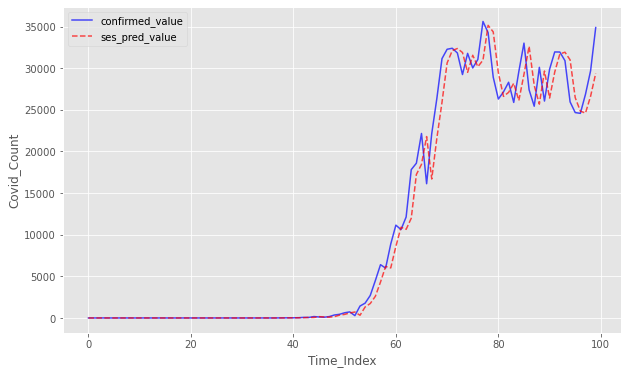

In [36]:
# 读取世界新冠肺炎确诊人数数据表
covid_data = pd.read_csv("./data/global_covid_count.csv",encoding='utf-8')
covid_data['Date'] = pd.to_datetime(covid_data['Date'])  # 将时间项转化为date_time格式，方便对时间操作

# 使用一次指数平滑
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  # 引入一次指数平滑方法
ses = SimpleExpSmoothing(covid_data['Confirmed_num']).fit(smoothing_level=0.9)  #构造一次指数平滑模型
covid_pred_ses = ses.fittedvalues[:100]  # 取前100个拟合值，如果需要向外延展预测则使用forecast（）函数
plt.figure(figsize=(10,6))
plt.plot(np.arange(100), covid_data['Confirmed_num'][:100],c='blue',alpha=0.7,label='confirmed_value')
plt.plot(np.arange(100),covid_pred_ses,c='red',alpha=0.7,label='ses_pred_value',ls='--')
plt.legend()
plt.xlabel("Time_Index")
plt.ylabel("Covid_Count")
plt.show()

**二次指数平滑法**：

有了一次指数平滑算法的基础，二次指数平滑和三次指数平滑就很简单了。二次指数平滑就是先进行一次指数平滑，再对一次平滑的结果的差分做一次指数平滑：

$$
\begin{aligned}
\hat{y}_{t+h \mid t} &=\ell_{t}+h b_{t}  \\
\ell_{t} &=\alpha y_{t}+(1-\alpha)\left(\ell_{t-1}+b_{t-1}\right) \quad \text{一次指数平滑} \\
b_{t} &=\beta^{*}\left(\ell_{t}-\ell_{t-1}\right)+\left(1-\beta^{*}\right) b_{t-1} \quad \text{一次平滑值差分后再做一次平滑法，相当于趋势项}
\end{aligned}
$$

其中，$0 \leq \alpha \leq 1$ 是水平平滑参数, $0 \leq \beta * \leq 1$ 是趋势平滑参数。

对于长期预测，使用二次指数平滑方法的预测在未来会无限期地增加或减少。 在这种情况下，我们使用具有阻尼参数$0 \le \varphi \le 1$的阻尼趋势方法来防止预测“失控”。

$$
\begin{aligned}
\hat{y}_{t+h \mid t} &=\ell_{t}+\left(\varphi+\varphi^{2}+\cdots+\varphi^{h}\right) b_{t} \\
\ell_{t} &=\alpha y_{t}+(1-\alpha)\left(\ell_{t-1}+\varphi b_{t-1}\right) \\
b_{t} &=\beta^{*}\left(\ell_{t}-\ell_{t-1}\right)+\left(1-\beta^{*}\right) \varphi b_{t-1}
\end{aligned}
$$

总结一下，二次指数平滑，通过引入一个额外的系数来解决指数平滑无法应用于具有趋势性数据的问题。同时，能够针对长期预测导致的“失控”问题给出一种利用阻尼系数的解决方案。

/Users/leo/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


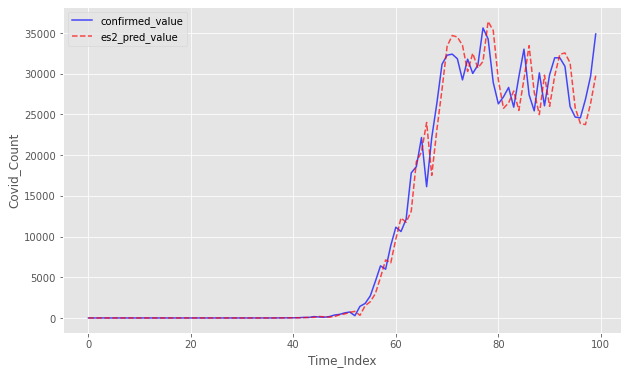

In [48]:
# 读取世界新冠肺炎确诊人数数据表
covid_data = pd.read_csv("./data/global_covid_count.csv",encoding='utf-8')
covid_data['Date'] = pd.to_datetime(covid_data['Date'])  # 将时间项转化为date_time格式，方便对时间操作

# 使用二次指数平滑
from statsmodels.tsa.holtwinters import Holt  # 引入二次指数平滑方法
es_2 = Holt(covid_data['Confirmed_num'],damped_trend=True).fit(smoothing_level=0.9, smoothing_slope=0.2)  #构造二次指数平滑模型,alpha=0.9, beta=0.2,阻尼参数damped_trend=True
covid_pred = es_2.fittedvalues[:100]  # 取前100个拟合值，如果需要向外延展预测则使用forecast（）函数
plt.figure(figsize=(10,6))
plt.plot(np.arange(100), covid_data['Confirmed_num'][:100],c='blue',alpha=0.7,label='confirmed_value')
plt.plot(np.arange(100),covid_pred,c='red',alpha=0.7,label='es2_pred_value',ls='--')
plt.legend()
plt.xlabel("Time_Index")
plt.ylabel("Covid_Count")
plt.show()

**三次指数平滑法**：

一次指数平滑法只能解决没有趋势也没有季节项的预测问题，二次指数平滑法能解决有趋势但是没有季节项的预测问题，那有没有既能解决趋势性，又能解决季节性的预测问题的算法呢？实际上，三次指数平滑法具备了解决趋势性以及季节性的时间序列预测问题。

$$
\begin{aligned}
\hat{y}_{i+h}&=s_{i}+h t_{i}+p_{i-k+h}\\
s_{i} &=\alpha\left(y_{i}-p_{i-k}\right)+(1-\alpha)\left(s_{i-1}+t_{i-1}\right) \\
t_{i} &=\beta\left(s_{i}-s_{i-1}\right)+(1-\beta) t_{i-1}  \quad \text{体现趋势性}\\      
p_{i} &=\gamma\left(y_{i}-s_{t-1}-t_{i-1}\right)+(1-\gamma) p_{i-k} \quad \text{体现季节性}
\end{aligned}
$$

上式表示的是三次指数平滑法，就像二次指数平滑法一样，三次指数平滑法使用三次的一次指数平滑法，分别表示：基准水平、趋势性和季节性。

/Users/leo/miniforge3/envs/pytorch_env/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


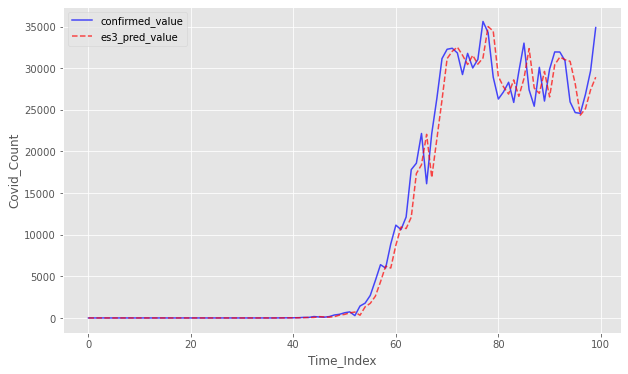

In [49]:
# 读取世界新冠肺炎确诊人数数据表
covid_data = pd.read_csv("./data/global_covid_count.csv",encoding='utf-8')
covid_data['Date'] = pd.to_datetime(covid_data['Date'])  # 将时间项转化为date_time格式，方便对时间操作

# 使用三次指数平滑
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # 引入三次指数平滑方法
es_3 = ExponentialSmoothing(covid_data['Confirmed_num'],trend="add", seasonal="add",seasonal_periods=7).fit(smoothing_level=0.9)  #构造三次指数平滑模型
covid_pred = es_3.fittedvalues[:100]  # 取前100个拟合值，如果需要向外延展预测则使用forecast（）函数
plt.figure(figsize=(10,6))
plt.plot(np.arange(100), covid_data['Confirmed_num'][:100],c='blue',alpha=0.7,label='confirmed_value')
plt.plot(np.arange(100),covid_pred,c='red',alpha=0.7,label='es3_pred_value',ls='--')
plt.legend()
plt.xlabel("Time_Index")
plt.ylabel("Covid_Count")
plt.show()

最后，给大家总结下三个指数平滑模型的使用情况与参数类型：

- 使用情况：

$$
\begin{array}{|l|c|c|}
\hline & \text { 趋势性 } & \text { 季节性 } \\
\hline \text { 一次指数平滑 } & \times & \times \\
\hline \text { 二次指数平滑 } & \checkmark & \times \\
\hline \text { 三次指数平滑 } & \checkmark & \checkmark \\
\hline
\end{array}
$$

- 参数类型：

$$
\begin{array}{|c|c|c|c|}
\hline \text { level（基准） } & \text { trend（趋势） } & \text { damping（阻尼） } & \text { seasonality（季节） } \\
\hline \alpha & \beta\text{或} \beta^{*}& \varphi & \gamma \\
\hline
\end{array}
$$

**总结与展望**：

本节课，我们主要学习了时间序列分析的两大目标：描述和预测。描述指的是我需要对时间序列的某些性质进行描述，包括：趋势性、季节性以及随机性，这是我们迈出时间序列分析的第一步，也是非常关键的一步，它能为预测打下坚实基础，如：时间序列分解的随机性的大小远远比趋势性、周期性大的话，那么说明我们进行预测的难度将会非常大，或许也是一个不可预测的问题。预测指的是需要通过历史数据预测未来的数据，这也是我们做时间序列分析的主要目标。

关于描述，我们主要学习了：
   - 分段趋势法
   - 回归直线趋势法
   - 二次曲线拟合法
   - 经典分解法
   - STL分解法（加法模型、乘法模型）

关于预测，我们主要学习了：
   - 朴素法
   - 移动平均法
   - 偏差与方差理论
   - 测试误差的估计：AIC/BIC、交叉验证
   - 时间序列的交叉验证方法：sklearn.model_selection.TimeSeriesSplit()与TSCV
   - 指数平滑法：一次指数平滑、二次指数平滑、三次指数平滑
   
时间序列的预测方法远不止这么少，本节介绍的预测方法只是冰山一角，我们在后面会学到更多、功能更强大的预测算法，分别是：
   - 线性预测模型之ARIMA模型与SARIMA模型
   - 基于多变量时间序列的SARIMAX模型、VAR模型与XGBoost（重点介绍）
   - 基于深度学习的时间序列模型基础：RNN与LSTM
   - 时间序列模型的特征工程及框架Tsfresh（TimeSeries Fresh）
   - 工程与比赛常用模型及框架简介：FB-Prophet（重点介绍）、AutoTS（重点介绍）、DeepAR等等。